## Bibliotecas

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing(True)

## Variáveis

In [7]:
Bx, By = symbols('B_x B_y')
x, y, z, k = symbols('x y z k')
An, Bn, Cn = symbols('A_n B_n C_n')
r, R1, R2, Rc = symbols('r R1 R2 R_c')
w, t, delta = symbols('omega, t, delta')
n, n0, Rref = symbols('n, n_0, R_ref')
B_r, B_theta = symbols('B_r, B_theta')
phi, phi_t, theta, Delta = symbols('phi, phi_t, theta Delta')
V, N, L = symbols('V N L')
n0 = 1

## Equações do Br e Btheta

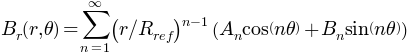

In [49]:
BrFuncao = (Bn*sin((n-n0+1)*theta)+An*cos((n-n0+1)*theta))*(r/Rref)**(n-n0)
Br = Eq(B_r(r, theta),Sum(BrFuncao,(n,n0,oo)))
Br

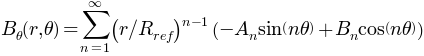

In [50]:
Btheta = (Bn*cos((n-n0+1)*theta)-An*sin((n-n0+1)*theta))*(r/Rref)**(n-n0)
Bt = Eq(B_theta(r,theta),Sum(Btheta,(n,n0,oo)))
Bt

## Informes Úteis

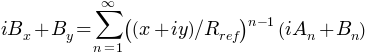

In [14]:
Eq((By+I*Bx),Sum((Bn+I*An)*((x+I*y)/Rref)**(n-n0),(n,n0,oo)))

In [54]:
tt = Eq(theta,w*t + delta)
tt

In [17]:
Cn_eq = Eq(Cn,Bn+I*An)
Cn_eq

# Sinal a partir de um bobina radial

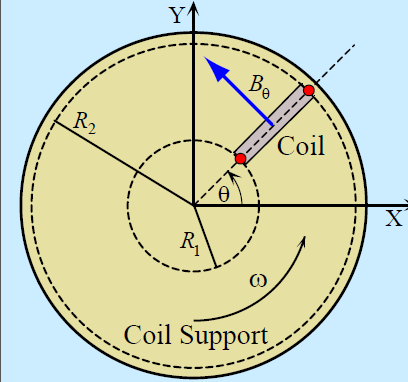

In [1]:
from IPython.display import Image
Image(filename='D:\ARQ\Imagens\Bobina_Radial.png')


## Fluxo através da bobina no tempo t

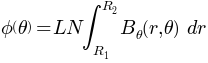

In [51]:
Flux = Eq(phi(theta),N*L*Integral(B_theta(r, theta),(r,R1,R2)))
Flux

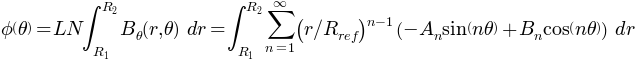

In [52]:
FluxI = Eq(phi(theta),L*N*Integral(Bt,(r,R1,R2)))
FluxI

### Retirando o somatório da Integral e calculando a Integral

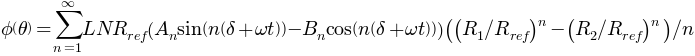

In [55]:
integralpart = Integral(Btheta,(r,R1,R2))
flux = N*L*integralpart.doit(conds='separate').simplify().subs(theta, tt.rhs)
#flux
FuncFlux = Eq(phi(theta),Sum((flux),(n,n0,oo)))
FuncFlux


## Sinal de tensão no tempo t:

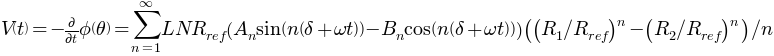

In [56]:
Eq(V(t),-diff(FuncFlux,t))

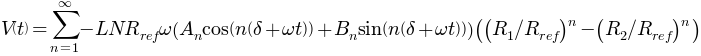

In [57]:
voltsfunc = -diff(flux,t).simplify()
voltsfunc
Volts = Eq(V(t),Sum((voltsfunc),(n,n0,oo)))
Volts

## A tensão integrada no tempo t:

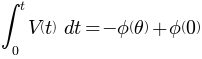

In [58]:
integr = Integral(Volts.lhs,(t,0,t))
Eq(integr,phi(0)-phi(theta))


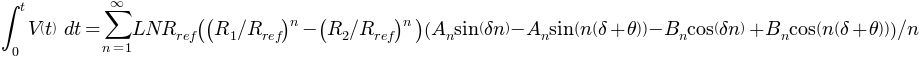

In [59]:
intintegral = Integral(voltsfunc,(t,0,t))
intintegral = intintegral.doit(conds='separate').simplify()
intVolts = Eq(Integral(Volts.lhs,(t,0,t)),Sum(intintegral,(n,n0,oo)))
intVolts = intVolts.subs(w*t,theta)
intVolts


# Sinal a partir da bobina tangencial

## Fluxo através da bobina no tempo t:

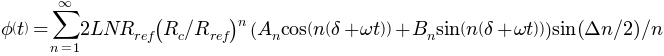

In [60]:
Eq(phi(t),N*L*Integral(BrFuncao.subs(r,Rc)*Rc,(theta,theta-Delta/2,theta+Delta/2)))
integralparte = Integral(BrFuncao.subs(r,Rc)*Rc,(theta,theta-Delta/2,theta+Delta/2))
fluxtang = N*L*integralparte.doit(conds='separate').simplify().subs(theta,tt.rhs)
FluxEq = Eq(phi(t),Sum(fluxtang,(n,n0,oo)))
FluxEq

## Sinal de tensão no tempo t:

In [61]:
Eq(Volts.lhs,-diff(FluxEq.lhs))

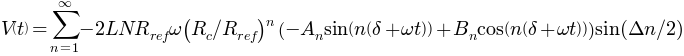

In [62]:
deriva = -diff(fluxtang,t).simplify()
Eq(Volts.lhs,Sum(deriva,(n,n0,oo)))

## A tensão integrada no tempo t:

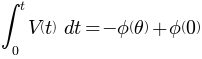

In [28]:
Eq(Integral(Volts.lhs,(t,0,t)),phi(0)-phi(theta))

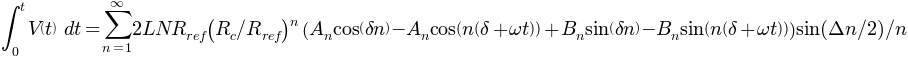

In [29]:
funcIntTan = Integral(deriva,(t,0,t)).doit(conds='separate').simplify()
#funcIntTan
Int_Voltage_Tan = Eq(Integral(Volts.lhs,(t,0,t)),Sum(funcIntTan,(n,n0,oo)))
Int_Voltage_Tan


## Dimensionando o Número de Espiras da Bobina Girante Tangencial

In [8]:
#Data for Booster

#An = Skew
#Bn = Normal

d = 0.040 #[mm; Diameter of Bore Radius (Gap)]
rref = (1/3)*d #[mm; 2/3 of the bore aperture in resistive magnets]
Rcenter = 0.0175 #[mm, Center Radius]
Len = 0.7954 #[mm, Coil Length]
omega = 2*np.pi #[rad/s]
Integrator_gain = 100 #Parameters of Integrator
pts = 144
step = (2*np.pi)/144 #Step Value

#Data from Wiki Sirius for Dipole (Rc = 17.5 mm)
B0 = 1.258
Bn0 = Dipnormal = B0*np.array([1, 0, 5.5E-04, 4.0E-04, -3.6E-04, 2.7E-04, -1.3E-04, 0, 0, 0, 0, 0, 0, 0, 0])
An0 = Dipskew = B0*np.array([0, 0, 1.0E-04, 1.0E-04, 1.0E-04, 1.0E-04, 1.0E-04, 0, 0, 0, 0, 0, 0, 0, 0])
#Dipsys = np.array([5.5E-04, 4.0E-04, -3.6E-04, 2.7E-04, -1.3E-04])

#fieldDN = B0*Dipnormal
#fieldDS = B0*Dipskew
#fieldDSYS = B0*Dipsys

#Data from Wiki Sirius for Quadrupole (Rc = 17.5 mm)
B1 = 20.264*(0.0175)*0.2 #Integrated Gradient (Maximum gradient extration*Length)
Bn1 = Quadnormal = B1*np.array([0, 1, 7e-4, 4e-4, 4e-4, -1e-3, 4e-4, 4e-4, 4e-4, 1.1e-3, 0, 0, 0, 8e-5, 0])
An1 = Quadskew = B1*np.array([0, 0, 1e-3, 5e-4, 1e-4, 1e-4, 1e-4, 1e-4, 1e-4, 0, 0, 0, 0, 0, 0])
#Quadsys = np.array([7.0E-04, 4.0E-04, 4.0E-04, -1.0E-03, 4.0E-04, 4.0E-04, 4.0E-04])

#fieldQN = B1*Quadnormal
#fieldQS = B1*Quadskew
#fieldQSYS = B1*Quadsys

#Data from Wiki Sirius for Sextupole (Rc = 17.5 mm)
B2 = 100.069*0.2*(0.0175)**2
Bn2 = Sextnormal = B2*np.array([0, 0, 1, 4e-4, 4e-4, 4e-4, 4e-4, 4e-4, -2.4e-2, 4e-4, 0, 0, 0, 0, -1.7e-2])
An2 = Sextskew = B2*np.array([0, 0, 0, 1e-4, 1e-4, 1e-4, 1e-4, 1e-4, 1e-4, 1e-4, 0, 0, 0, 0, 0])
#Sextsys = np.array([4.0E-04, 4.0E-04, 4.0E-04, 4.0E-04, 4.0E-04, -2.4E02, 4.0E-04])

#fieldSN = B2*Sextnormal
#fieldSS = B2*Sextskew
#fieldSSYS = B2*Sextsys

thetaarray = np.linspace(0,2*np.pi-2*np.pi/pts, pts)

#Bucking Dipolo
delta_theta_0 = np.pi

#bucking quadrupole
delta_theta_1 = np.pi/2

#bucking_sextupolo
delta_theta_2 = np.pi/3

#Vector delta
delta_theta = np.array([np.pi, np.pi/2, np.pi/3])

In [9]:
#V(t,n) Tangential Coil
eq_vt = Eq(V(t, n), -2*L*Rc*N*w*(Rc/Rref)**(n)*(n)*(Bn*cos(n*theta)-An*sin(n*theta))*sin(Delta*n/2))
eq_vt

In [10]:
#Calculus for coil 15°
N_espiras = 20

#Calculating V(t) for dipole:
valor = np.zeros(pts)
for j in range(pts):
    for i in range(len(Bn0)):
        valor[j] = valor[j] + eq_vt.rhs.subs({L:Len, Rc:Rcenter, w:omega, Rref:rref, n:i+1,\
                                          Bn:Bn0[i], An:An0[i], Delta:delta_theta[0],\
                                          theta:thetaarray[j], N:N_espiras})
#Calculating V(t) for Quadrupole:
valor1 = np.zeros(pts)
for j in range(pts):
    for i in range(len(Bn1)):
        valor1[j] = valor1[j] + eq_vt.rhs.subs({L:Len, Rc:Rcenter, w:omega, Rref:rref, n:i+1,\
                                          Bn:Bn1[i], An:An1[i], Delta:delta_theta[0],\
                                          theta:thetaarray[j], N:N_espiras})
        
#Calculating V(t) for Sextupole:
valor2 = np.zeros(pts)
for j in range(pts):
    for i in range(len(Bn1)):
        valor2[j] = valor2[j] + eq_vt.rhs.subs({L:Len, Rc:Rcenter, w:omega, Rref:rref, n:i+1,\
                                          Bn:Bn2[i], An:An2[i], Delta:delta_theta[0],\
                                          theta:thetaarray[j], N:N_espiras})
max(abs(valor)), max(abs(valor1)), max(abs(valor2))


C:\Python34\lib\site-packages\IPython\core\formatters.py:239: FormatterWarning: Exception in image/png formatter: 
\begin{pmatrix}5.75581477281, & 0.0189406277747, & 0.415973357962\end{pmatrix}
^
Unknown symbol: \begin (at char 0), (line:1, col:1)
  FormatterWarning,


(5.75581477281, 0.0189406277747, 0.415973357962)

Populating the interactive namespace from numpy and matplotlib


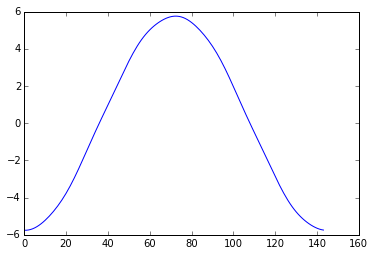

In [30]:
%pylab inline 
plt.plot(valor)
plt.show()

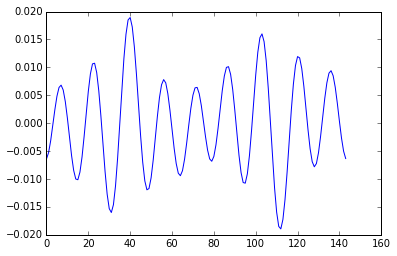

In [31]:
plt.plot(valor1)
plt.show()

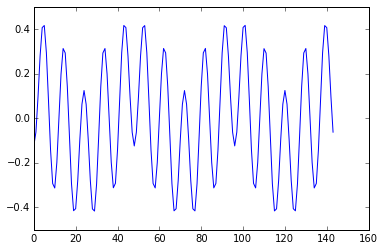

In [32]:
plt.plot(valor2)
plt.show()

## Rebuilding the calculus for new methods

In [15]:
#Dados:
Length = np.array([1, 0.2, 0.2]) #[m] Comprimento dos magnetos, onde a bobina está imersa em campo magnético
rc = 0.0175 #[m]
omega = 2*np.pi #[rad/s]
bore_aperture = 0.04 #[m]
gap = 0.028 #[m]
#rref = (1/3)*bore_aperture #[m]
rref = 0.0175 #[m]
B_0 = 1.258 #[T] Campo do dipolo, segundo tabela na wiki
B_1 = 20.264 #[T/m] Gradiente do quadrupolo, segundo tabela na wiki
B_2 = 100.069 #[T/m²] Gradiente do sextupolo, segundo tabela na wiki


Ganho_integrador = 100
fundo_escala = 10/Ganho_integrador
n_pontos = 144

thetaarray = np.linspace(0,2*np.pi-2*np.pi/n_pontos, n_pontos)

#Perfil do dipolo para Rc = 17.5mm (para Nn, leva em consideração somente erro sistemático, quando há)
Nn_0 = B_0*np.array([1, 0, 5.5e-4, 4e-4, -3.6e-4, 2.7e-4, -1.3e-4, 0, 0, 0, 0, 0, 0, 0, 0])
Sn_0 = B_0*np.array([0, 0, 1e-4, 1e-4, 1e-4, 1e-4, 1e-4, 0, 0, 0, 0, 0, 0, 0, 0])

#Perfil do quadrupolo para Rc = 17.5mm (para Nn, leva em consideração somente erro sistemático, quando há)
Nn_1 = B_1*np.array([0, 1, 7e-4, 4e-4, 4e-4, -1e-3, 4e-4, 4e-4, 4e-4, 1.1e-3, 0, 0, 0, 8e-5, 0])
Sn_1 = B_1*np.array([0, 0, 1e-3, 5e-4, 1e-4, 1e-4, 1e-4, 1e-4, 1e-4, 0, 0, 0, 0, 0, 0])

#Perfil do sextupolo para Rc = 17.5mm (para Nn, leva em consideração somente erro sistemático, quando há)
Nn_2 = B_2*np.array([0, 0, 1, 4e-4, 4e-4, 4e-4, 4e-4, 4e-4, -2.4e-2, 4e-4, 0, 0, 0, 0, -1.7e-2])
Sn_2 = B_2*np.array([0, 0, 0, 1e-4, 1e-4, 1e-4, 1e-4, 1e-4, 1e-4, 1e-4, 0, 0, 0, 0, 0])

#Bucking dipolo:     delta_theta = np.pi
#Bucking quadrupolo: delta_theta = np.pi/2
#Bucking sextupolo:  delta_theta = np.pi/3
#Dimensionar N para as seguintes aberturas angulares:
delta_theta = np.array([np.pi/12, np.pi, np.pi/2, np.pi/3])

#V(t, n) para bobina tangencial:
eq_vt = Eq(V(theta, n), -2*L*Rc*N*w*(Rc/Rref)**(n-1)*(Bn*cos(n*theta)-An*sin(n*theta))*sin(Delta*n/2))

eq_vt

In [38]:
####### Cálculo para bobina 15º #######
N_espiras = 20
rref = 1

#Calculus V(T0) para o dipolo:
v_0 = np.zeros((n_pontos,len(Nn_0)+1), float)
for j in range(n_pontos):
    for i in range(len(Nn_0)):
        v_0[j][i+1] = eq_vt.rhs.subs({L:Length[0], Rc:rc, w:omega, Rref:rref, n:i+1,
                                      Bn:Nn_0[i], An:Sn_0[i], Delta:delta_theta[0],
                                      theta:thetaarray[j], N:N_espiras})
    v_0[j][0] = v_0[j][1:].sum()

#Calculus V(T0) para o quadupolo:
v_1 = np.zeros((n_pontos,len(Nn_1)+1), float)
for j in range(n_pontos):
    for i in range (len(Nn_1)):
        v_1[j][i+1] = eq_vt.rhs.subs({L:Length[0], Rc:rc, w:omega, Rref:rref, n:i+1,
                                      Bn:Nn_1[i], An:Sn_1[i], Delta:delta_theta[0],
                                      theta:thetaarray[j], N:N_espiras})
    v_1[j][0] = v_1[j][1:].sum()

#Calculus V(T0) para o quadupolo:
v_2 = np.zeros((n_pontos,len(Nn_2)+1), float)
for j in range(n_pontos):
    for i in range (len(Nn_2)):
        v_2[j][i+1] = eq_vt.rhs.subs({L:Length[0], Rc:rc, w:omega, Rref:rref, n:i+1,
                                       Bn:Nn_2[i], An:Sn_2[i], Delta:delta_theta[0],
                                       theta:thetaarray[j], N:N_espiras})
    v_2[j][0] = v_2[j][1:].sum()
    
max_index = np.array([np.argmax(abs(v_0[:,0])), np.argmax(abs(v_1[:,0])), np.argmax(abs(v_2[:,0]))])
v_0[max_index[0],0], v_1[max_index[0],0], v_2[max_index[0],0]

(-0.722198257396, -0.403687531125, -0.0515818939914)

In [39]:
###### Cálculo para a bobina pi (bucking do dipolo) ######
N_espiras = 1


#Calculando V(t) para o dipolo em theta cuja tensão induzida por dipolo na bobina 15º é máxima:
v_0_dip = eq_vt.rhs.subs({L:Length[0], Rc:rc, w:omega, Rref:rref, n:1,
                          Bn:Nn_0[0], An:Sn_0[0], Delta:delta_theta[1],
                          theta:thetaarray[max_index[0]], N:N_espiras})

#Calculando V(t) para o quadrupolo em theta cuja tensão induzida por dipolo na bobina 15º é máxima:
v_1_dip = eq_vt.rhs.subs({L:Length[1], Rc:rc, w:omega, Rref:rref, n:1,
                          Bn:Nn_1[0], An:Sn_1[0], Delta:delta_theta[1],
                          theta:thetaarray[max_index[0]], N:N_espiras})

#Calculando V(t) para o sextupolo em theta cuja tensão induzida por dipolo na bobina 15º é máxima:
v_2_dip = eq_vt.rhs.subs({L:Length[2], Rc:rc, w:omega, Rref:rref, n:1,
                          Bn:Nn_2[0], An:Sn_2[0], Delta:delta_theta[1],
                          theta:thetaarray[max_index[0]], N:N_espiras})
v_0_dip, v_1_dip, v_2_dip

(-0.276648649075117, 0, 0)

In [41]:
###### Cálculo para a bobina pi/2 (bucking do dipolo) ######
N_espiras = 1


#Calculando V(t) para o dipolo em theta cuja tensão induzida por dipolo na bobina 15º é máxima:
v_0_quad = eq_vt.rhs.subs({L:Length[0], Rc:rc, w:omega, Rref:rref, n:2,
                          Bn:Nn_0[1], An:Sn_0[1], Delta:delta_theta[2],
                          theta:thetaarray[max_index[1]], N:N_espiras})

#Calculando V(t) para o quadrupolo em theta cuja tensão induzida por dipolo na bobina 15º é máxima:
v_1_quad = eq_vt.rhs.subs({L:Length[1], Rc:rc, w:omega, Rref:rref, n:2,
                          Bn:Nn_1[1], An:Sn_1[1], Delta:delta_theta[2],
                          theta:thetaarray[max_index[1]], N:N_espiras})

#Calculando V(t) para o sextupolo em theta cuja tensão induzida por dipolo na bobina 15º é máxima:
v_2_quad = eq_vt.rhs.subs({L:Length[2], Rc:rc, w:omega, Rref:rref, n:2,
                          Bn:Nn_2[1], An:Sn_2[1], Delta:delta_theta[2],
                          theta:thetaarray[max_index[1]], N:N_espiras})
v_0_quad, v_1_quad, v_2_quad

C:\Python34\lib\site-packages\IPython\core\formatters.py:239: FormatterWarning: Exception in image/png formatter: 
\begin{pmatrix}0, & 0.0155970022154242, & 0\end{pmatrix}
^
Unknown symbol: \begin (at char 0), (line:1, col:1)
  FormatterWarning,


(0, 0.0155970022154242, 0)

In [43]:
###### Cálculo para a bobina pi/3 (bucking do sextupolo) ######
N_espiras = 1


#Calculando V(t) para o dipolo em theta cuja tensão induzida por dipolo na bobina 15º é máxima:
v_0_sext = eq_vt.rhs.subs({L:Length[0], Rc:rc, w:omega, Rref:rref, n:3,
                          Bn:Nn_0[2], An:Sn_0[2], Delta:delta_theta[3],
                          theta:thetaarray[max_index[2]], N:N_espiras})

#Calculando V(t) para o quadrupolo em theta cuja tensão induzida por dipolo na bobina 15º é máxima:
v_1_sext = eq_vt.rhs.subs({L:Length[1], Rc:rc, w:omega, Rref:rref, n:3,
                          Bn:Nn_1[2], An:Sn_1[2], Delta:delta_theta[3],
                          theta:thetaarray[max_index[2]], N:N_espiras})

#Calculando V(t) para o sextupolo em theta cuja tensão induzida por dipolo na bobina 15º é máxima:
v_2_sext = eq_vt.rhs.subs({L:Length[2], Rc:rc, w:omega, Rref:rref, n:3,
                          Bn:Nn_2[2], An:Sn_2[2], Delta:delta_theta[3],
                          theta:thetaarray[max_index[2]], N:N_espiras})
v_0_sext, v_1_sext, v_2_sext

(-4.65980068285901e-8, -1.91063277138946e-7, -0.00134788725114328)

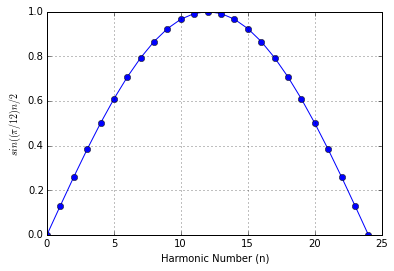

In [45]:
sensitivity = sin(n*Delta/2)
sens_pi12 = [sensitivity.subs({n: i, Delta:np.pi/12}) for i in range(25)]
plt.plot(sens_pi12, 'bo-', label = '$\Delta \\theta = \pi/12$')
plt.xlabel('Harmonic Number (n)')
plt.ylabel('$sin((\pi/12)n/2$')
plt.grid('on')

### Cálculo de delta de fluxo magnético (valor retornado pelo integrador)

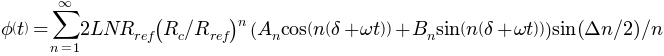

In [64]:
FluxEq


In [65]:
fluxtang

In [13]:
equacao_fluxo = Eq(phi(theta,n),2*L*Rref*N*(1/n)*(Rc/Rref)**(n)*(An*cos(n*theta)+Bn*sin(n*theta))*sin(Delta*n/2))
equacao_fluxo

In [26]:
#### Cálculo para a bobia de 15° #####
N_espiras = 10
rc = 0.0175
rref = 1
n_pontos = 144

thetaarray = np.linspace(-np.pi/4, 2*np.pi-np.pi/4-2*np.pi/n_pontos, n_pontos)

#Cálculo V(t) para o dipolo:
dephi_0 = np.zeros((n_pontos,len(Nn_0)+1))
for i in range(n_pontos):
    for j in range(len(Nn_0)):
        dephi_0[i][j+1] = equacao_fluxo.rhs.subs({L:Length[0], Rc:rc, w:omega, Rref:rref, n:j+1,
                                                 Bn:Nn_0[j], An:Sn_0, Delta:delta_theta[0],
                                                 theta:thetaarray[i], N:N_espiras})
    dephi_0[i][0] = dephi_0[i][1:].sum()

#Cálculo V(t) para a quadrado:
dephi_1 = np.zeros((n_pontos,len(Nn_1)+1))
for i in range(n_pontos):
    for j in range(len(Nn_0)):
        dephi_1[i][j+1] = equacao_fluxo.rhs.subs({L:Length[1], Rc:rc, w:omega, Rref:rref, n:j+1,
                                                 Bn:Nn_1[j], An:Sn_1, Delta:delta_theta[0],
                                                 theta:thetaarray[i], N:N_espiras})
    dephi_1[i][0] = dephi_1[i][1:].sum()
    
#Cálculo V(t) para o sextupolo:
dephi_2 = np.zeros((n_pontos, len(Nn_2)+1))
for i in range(n_pontos):
    for j in range(len(Nn_0)):
        dephi_2[i][j+1] = equacao_fluxo.rhs.subs({L:Length[2], Rc:rc, w:omega, Rref:rref, n:j+1,
                                                 Bn:Nn_2[j], An:Sn_2, Delta:delta_theta[0],
                                                 theta:thetaarray[i], N:N_espiras})
    dephi_2[i][0] = dephi_2[i][1:].sum()

SympifyError: SympifyError: array([], shape=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), dtype=float64)